# Shanghai Rankings Regression Analysis

### 1-2. Importing libraries and data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [13]:
# Import dataset

df_shanghai = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shanghai_top100.csv'))

### 3. Data Cleaning

##### Removing irrelevant columns

In [14]:
# Drop index column

df_shanghai = df_shanghai.drop(columns = ['Unnamed: 0'])

##### Missing values

In [15]:
# Check for missing values

df_shanghai.isnull().sum()

world_rank_Shanghai       0
university_name           0
national_rank             0
overall_score_Shanghai    0
alumni_score              0
award_score               0
hici_score                0
ns_score                  0
publication_score         0
pcp_score                 0
year                      0
country                   0
dtype: int64

No missing values.

##### Duplicates check

In [16]:
# Create a dataframe with just duplicated values

dups = df_shanghai.duplicated()

In [17]:
# Check size of duplicated dataframe

dups.shape 

(1101,)

No duplicates.

##### Extreme values checks

In [18]:
df_shanghai.describe()

,world_rank_Shanghai,national_rank,overall_score_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,50.306994,15.710263,36.383470,25.576658,26.719255,35.376748,32.587103,53.767666,31.522343,2009.989101
std,28.734019,16.461983,13.557186,18.650148,22.021721,16.105656,15.019464,12.279979,12.621984,3.163409
min,1.000000,1.000000,23.500000,0.000000,0.000000,0.000000,5.600000,19.000000,14.800000,2005.000000
25%,26.000000,2.000000,27.400000,14.400000,14.100000,24.100000,21.900000,45.800000,24.500000,2007.000000
50%,50.000000,7.000000,31.300000,21.300000,22.200000,32.300000,28.300000,52.400000,28.400000,2010.000000
75%,75.000000,29.000000,41.800000,32.900000,34.000000,43.700000,40.500000,62.000000,34.200000,2013.000000
max,100.000000,55.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2015.000000


There do not seem to be any extreme values for the scores in this dataset, which makes sense since each score should be out of 100. 

### 4. Data Exploration of Variables

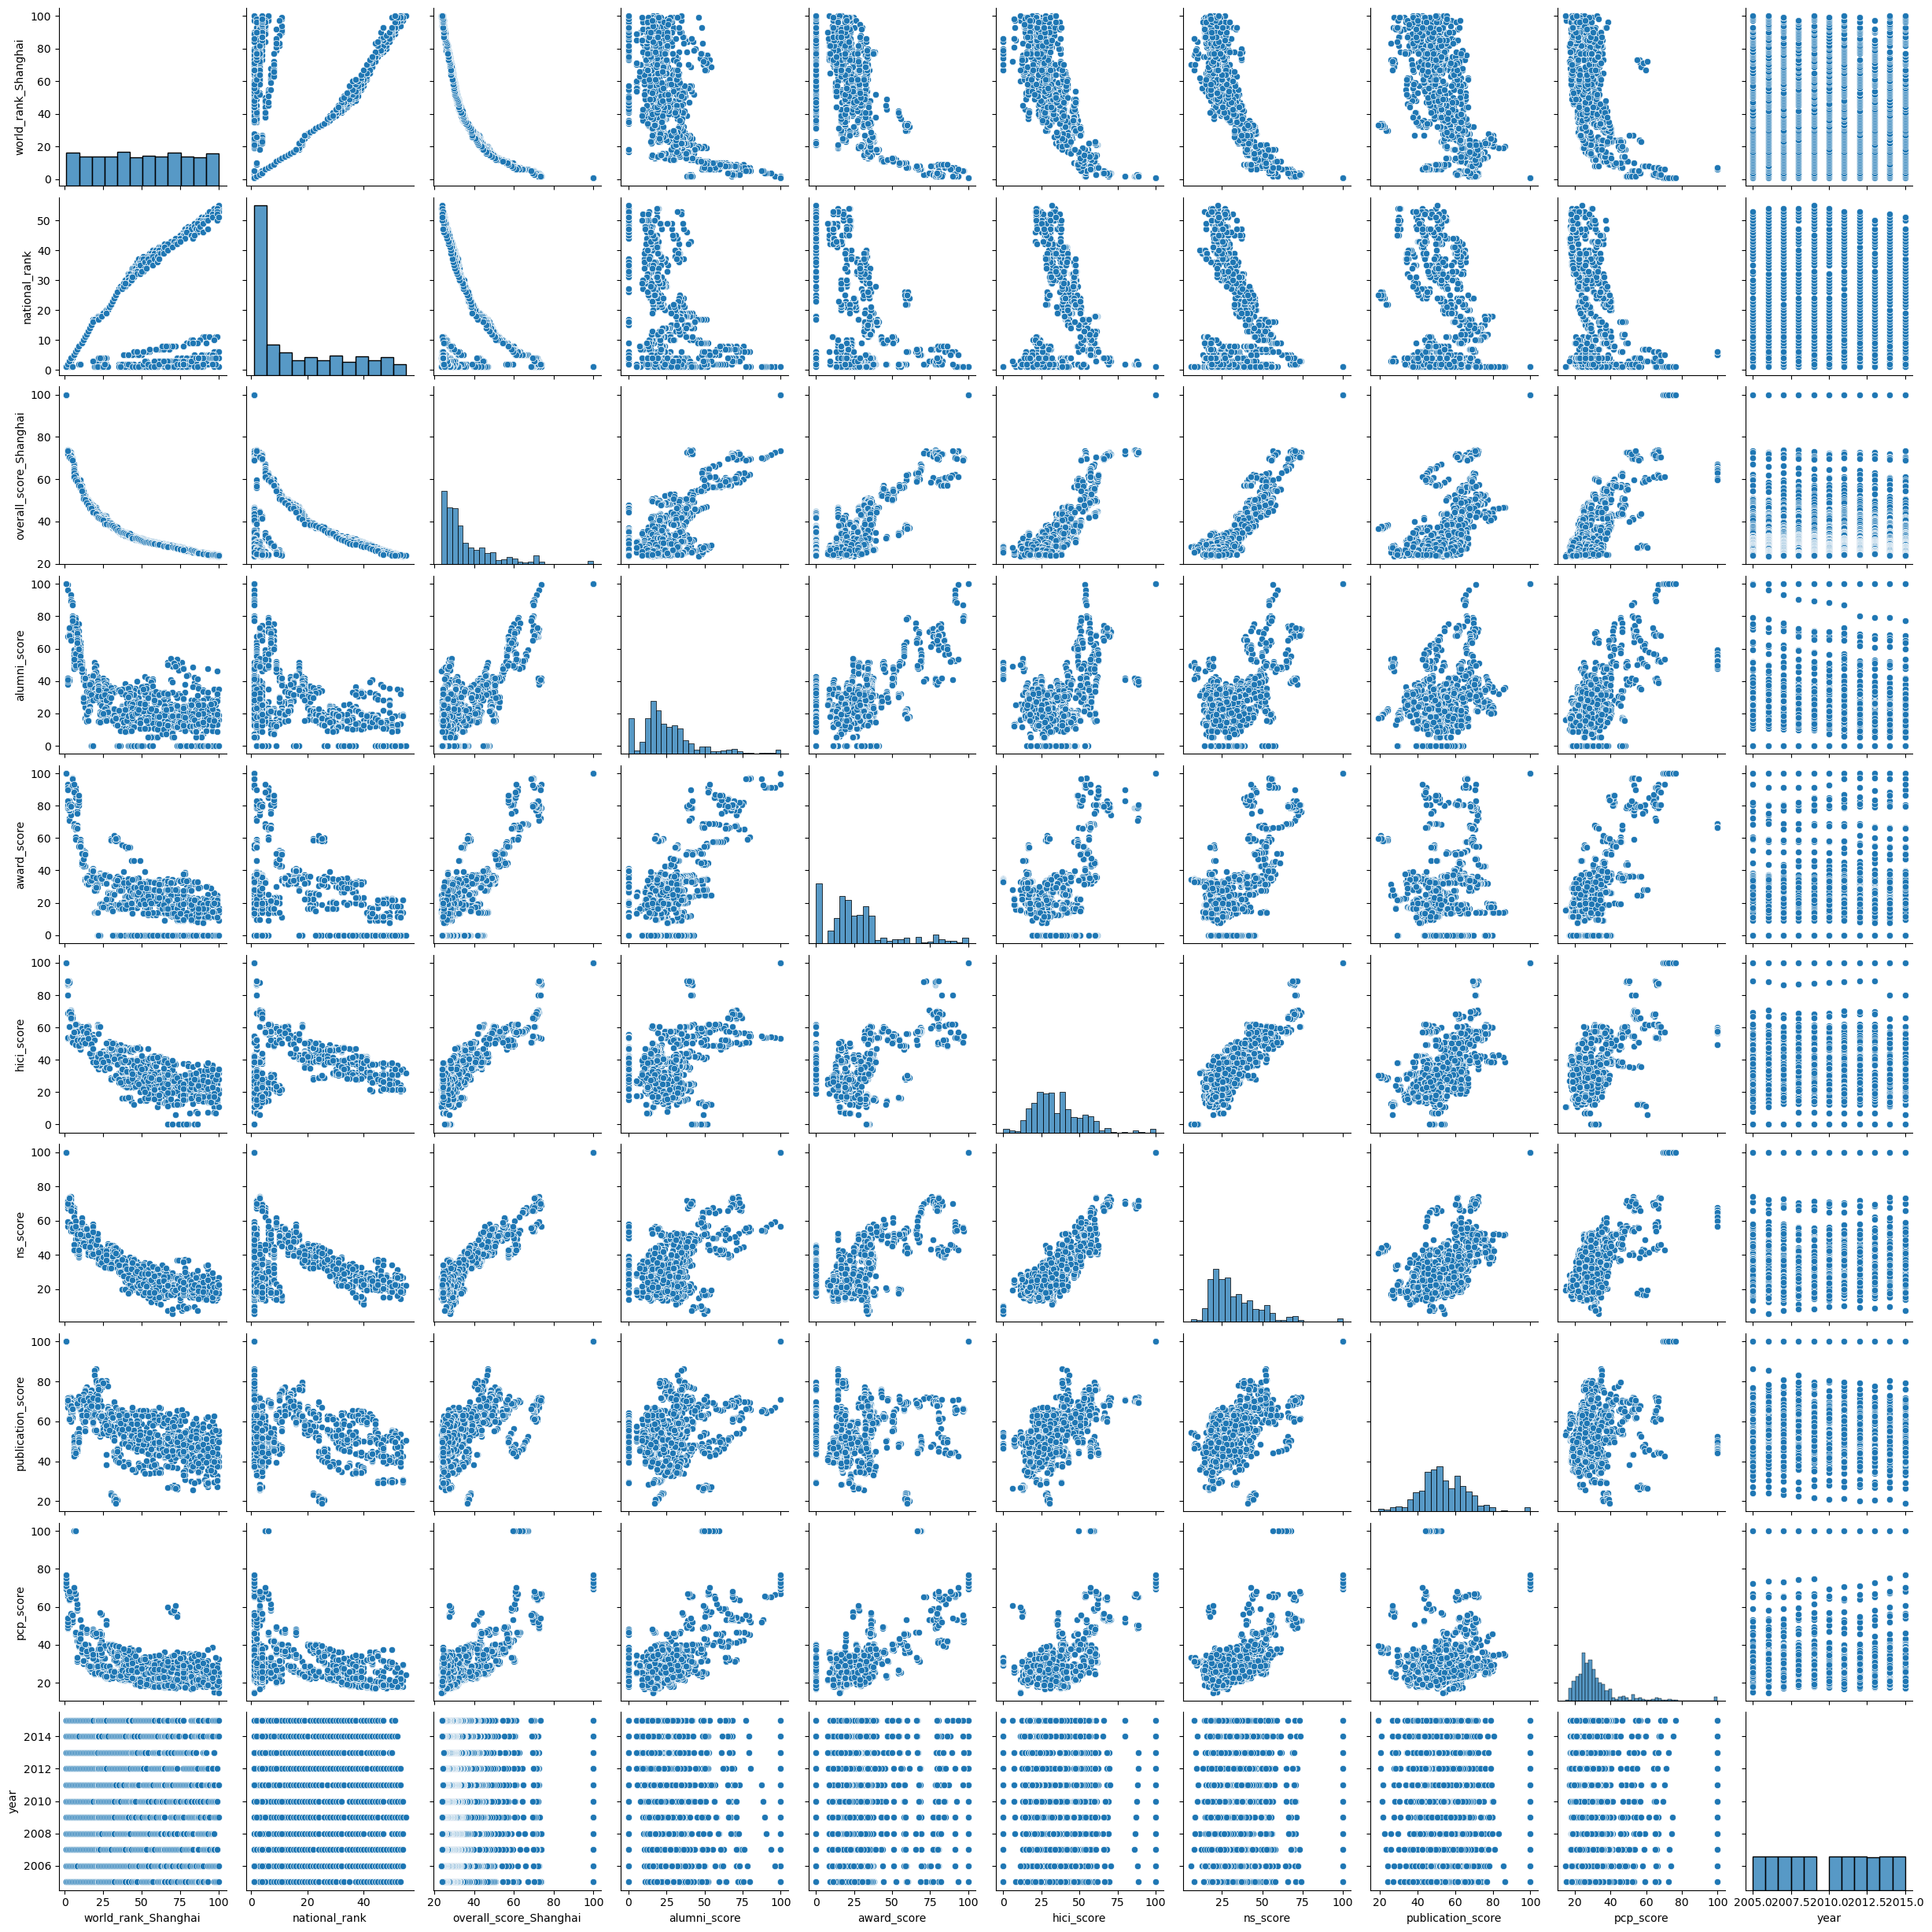

In [20]:
# Create a pair plot to see relationships between variables

g = sns.pairplot(df_shanghai)

#### Investigate variables further 

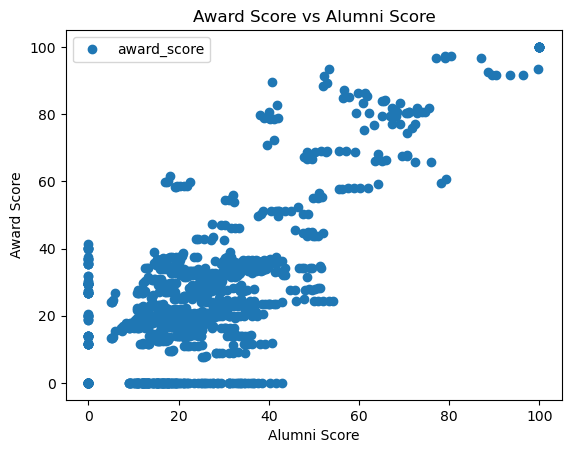

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_shanghai.plot(x = 'alumni_score', y='award_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Award Score vs Alumni Score')  
plt.xlabel('Alumni Score')  
plt.ylabel('Award Score')  
plt.show()
plt.tight_layout()

### 5. Hypothesis

#### Universities with a high alumni score will likely have a high award score .

### 6. Reshaping variables

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_shanghai['alumni_score'].values.reshape(-1,1)
y = df_shanghai['award_score'].values.reshape(-1,1)

In [24]:
X

array([[100. ],
       [ 99.8],
       [ 41.1],
       ...,
       [  0. ],
       [  8.9],
       [  0. ]])

In [25]:
y

array([[100. ],
       [ 93.4],
       [ 72.2],
       ...,
       [  0. ],
       [  0. ],
       [  0. ]])

### 7. Split data into training and test set

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Running Linear Regression on data

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9. Plotting the test data and the regression line

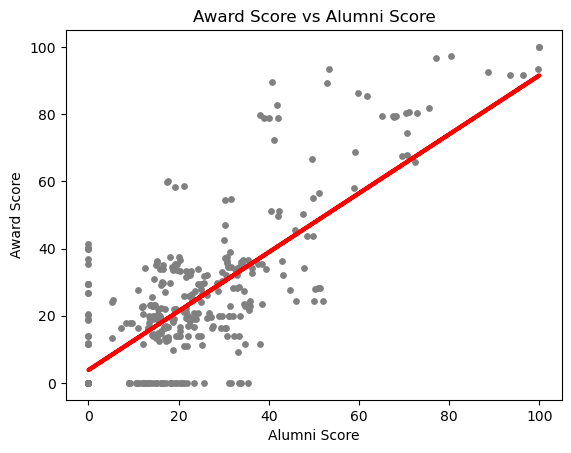

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Award Score vs Alumni Score')
plot_test.xlabel('Alumni Score')
plot_test.ylabel('Award Score')
plot_test.show()

### 10. Interpretation of the graph

The regression line seems to be an alright good fit. There are a decent amount of outliers, in particular the universities that have 100 in alumni score and a 0 in award score and vice versa. In addition, many of the outliers had a higher award score than alumni score, which could be due to the fact that it's more likely to have highly accredited staff win nobel prizes than alumni of the school.

### 11. Checking the model's performance statistics

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.87706638]]
Mean squared error:  239.46921094649562
R2 score:  0.5470605879299115


Based on the R squared value, the value of 0.547 indicates that it is not very accurate. There is a positive correlation between the variables indicating some kind of positive relationship but the trend line created from the regression analysis can clearly be seen missing many values. In addition, the error based on the Mean squared error is roughly 15.47, which is actually a significant amount since the overall scores are out of 100. The model is decently accurate and the linear regression may not be the most optimal model to use. 

### 12. Comparing predicted y values vs actual y values

In [33]:
y_predicted

array([[23.12445378],
       [35.666503  ],
       [45.84047299],
       [15.58168292],
       [23.38757369],
       [38.03458222],
       [16.02021611],
       [20.8440812 ],
       [18.65141525],
       [15.31856301],
       [16.80957585],
       [30.31639809],
       [24.44005335],
       [63.73262712],
       [17.07269577],
       [11.98571077],
       [31.45658438],
       [34.35090343],
       [20.40554801],
       [34.78943662],
       [34.9648499 ],
       [ 3.82899344],
       [26.36959938],
       [16.4587493 ],
       [38.9116486 ],
       [17.86205551],
       [40.92890127],
       [25.84335956],
       [30.75493128],
       [13.38901697],
       [55.5759098 ],
       [15.66938956],
       [31.89511757],
       [20.05472145],
       [20.14242809],
       [81.44936798],
       [14.88002982],
       [16.19562939],
       [10.23157801],
       [25.14170645],
       [17.51122896],
       [31.89511757],
       [21.72114757],
       [ 3.82899344],
       [23.47528033],
       [ 3

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32.1,23.124454
1,34.3,35.666503
2,34.2,45.840473
3,20.0,15.581683
4,18.8,23.387574
5,78.7,38.034582
6,23.1,16.020216
7,21.9,20.844081
8,16.4,18.651415
9,16.4,15.318563


##### Thoughts:

This model worked decently well to predict award vs alumni scores but there may have been potential data bias. For one, while the criteria that the Shanghai Rankings used to evaluate universities are supposed to be independent of each other, they most likely aren't. Certain factors are likely tied together. For example, universities with high award scores likely have elite faculty or students who have also conduct independent or funded research, which would increase the amount of awards earned. Prestigious universities tend to attract the best of the best, so it's not uncommon for these schools to have higher scores in both these criteria.

Another possible issue with this regression analysis is that it was only run on a subset of the original data. This dataframe only contained around 1100 rows for analysis, which may have made the model less accurate. Pairplots and regression analysis could have been done on the original dataset with 4898 rows, but the large amount of datapoints would have affected scatterplots and made analysis even more difficult. In addition, analysis with top universities based on the Shanghai criteria regarding world ranking could only be done with the top 100 universities per year, since rankings below those were lumped together in ranges (ex: 101-150, 201-250, etc.) so I had to use a subset with definite world rankings. 

Regression analysis may have led to more interesting insights when predicting a university's projected world ranking vs time. This dataset has the most data compared to the other datasets, with data from 2005 all the way to 2015, but this still means that a university only has at most 11 datapoints for world rankings. Forecasting with only 11 datapoints still could lead to wide margins of error, especially if a university had an outlier for world ranking in a particular year. Another possible application of regression analysis could be projecting an individual country's average world ranking, but this would have similar problems with low amounts of datapoints. 